In [1]:
import numpy as np
import matplotlib
import pandas as pd
import tensorflow as tf

dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)
X_test = pd.DataFrame(test.iloc[:,4:15].values)
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



2024-07-02 10:27:38.231644: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [2]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from deepforest import CascadeForestRegressor

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=1000, learning_rate=1.0,
    max_depth=1, random_state=0)
model.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=1.0, max_depth=1, n_estimators=1000,
                          random_state=0)

In [4]:
res = model.predict(X_test)
print(res)

[-1.34400077 17.01046756 12.42426016  3.90034517 10.77450515 22.2548135
 15.75267483  3.89781696 -0.58383366 32.54452964 -0.48762622 26.7596982
  3.72043959 25.0108714   2.29636706 40.50943883 -0.58383366 32.65207583
  5.53113291 36.22532898  7.01879353 42.09840558  1.11635188 11.12734218
  9.16061399  5.49767887 47.15284197 24.97928572 46.40351352  6.50222162
  9.80278681 32.26371358  4.08762283 43.51984381 26.11382074 50.95359815
  9.80278681 11.80296905 35.87149209  4.08762283 47.39453655 32.03795544
 79.35544408 19.05515101 13.23197547 17.53624871  4.08762283 47.39453655
 47.39453655 79.65356197 13.23197547 11.80296905 13.23197547  8.17348798
 22.94256028 32.15868178 30.34010282 10.03106526 10.49856898 32.03795544
  4.08762283 38.62228838 11.05568241 39.78103393 20.92251286 10.26478943
 15.19867058  7.48332436 40.0456463  33.49114346 26.84184759 22.49193264
 11.47670654 31.87128201  5.54081085 29.78472233 28.57376714 32.94929861
 16.68534573 16.68534573 28.57376714  1.4905406  11.2

In [5]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)


0.7239766054097969
7.297294770432873
0.5973360117365796
9.616728288122848


Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


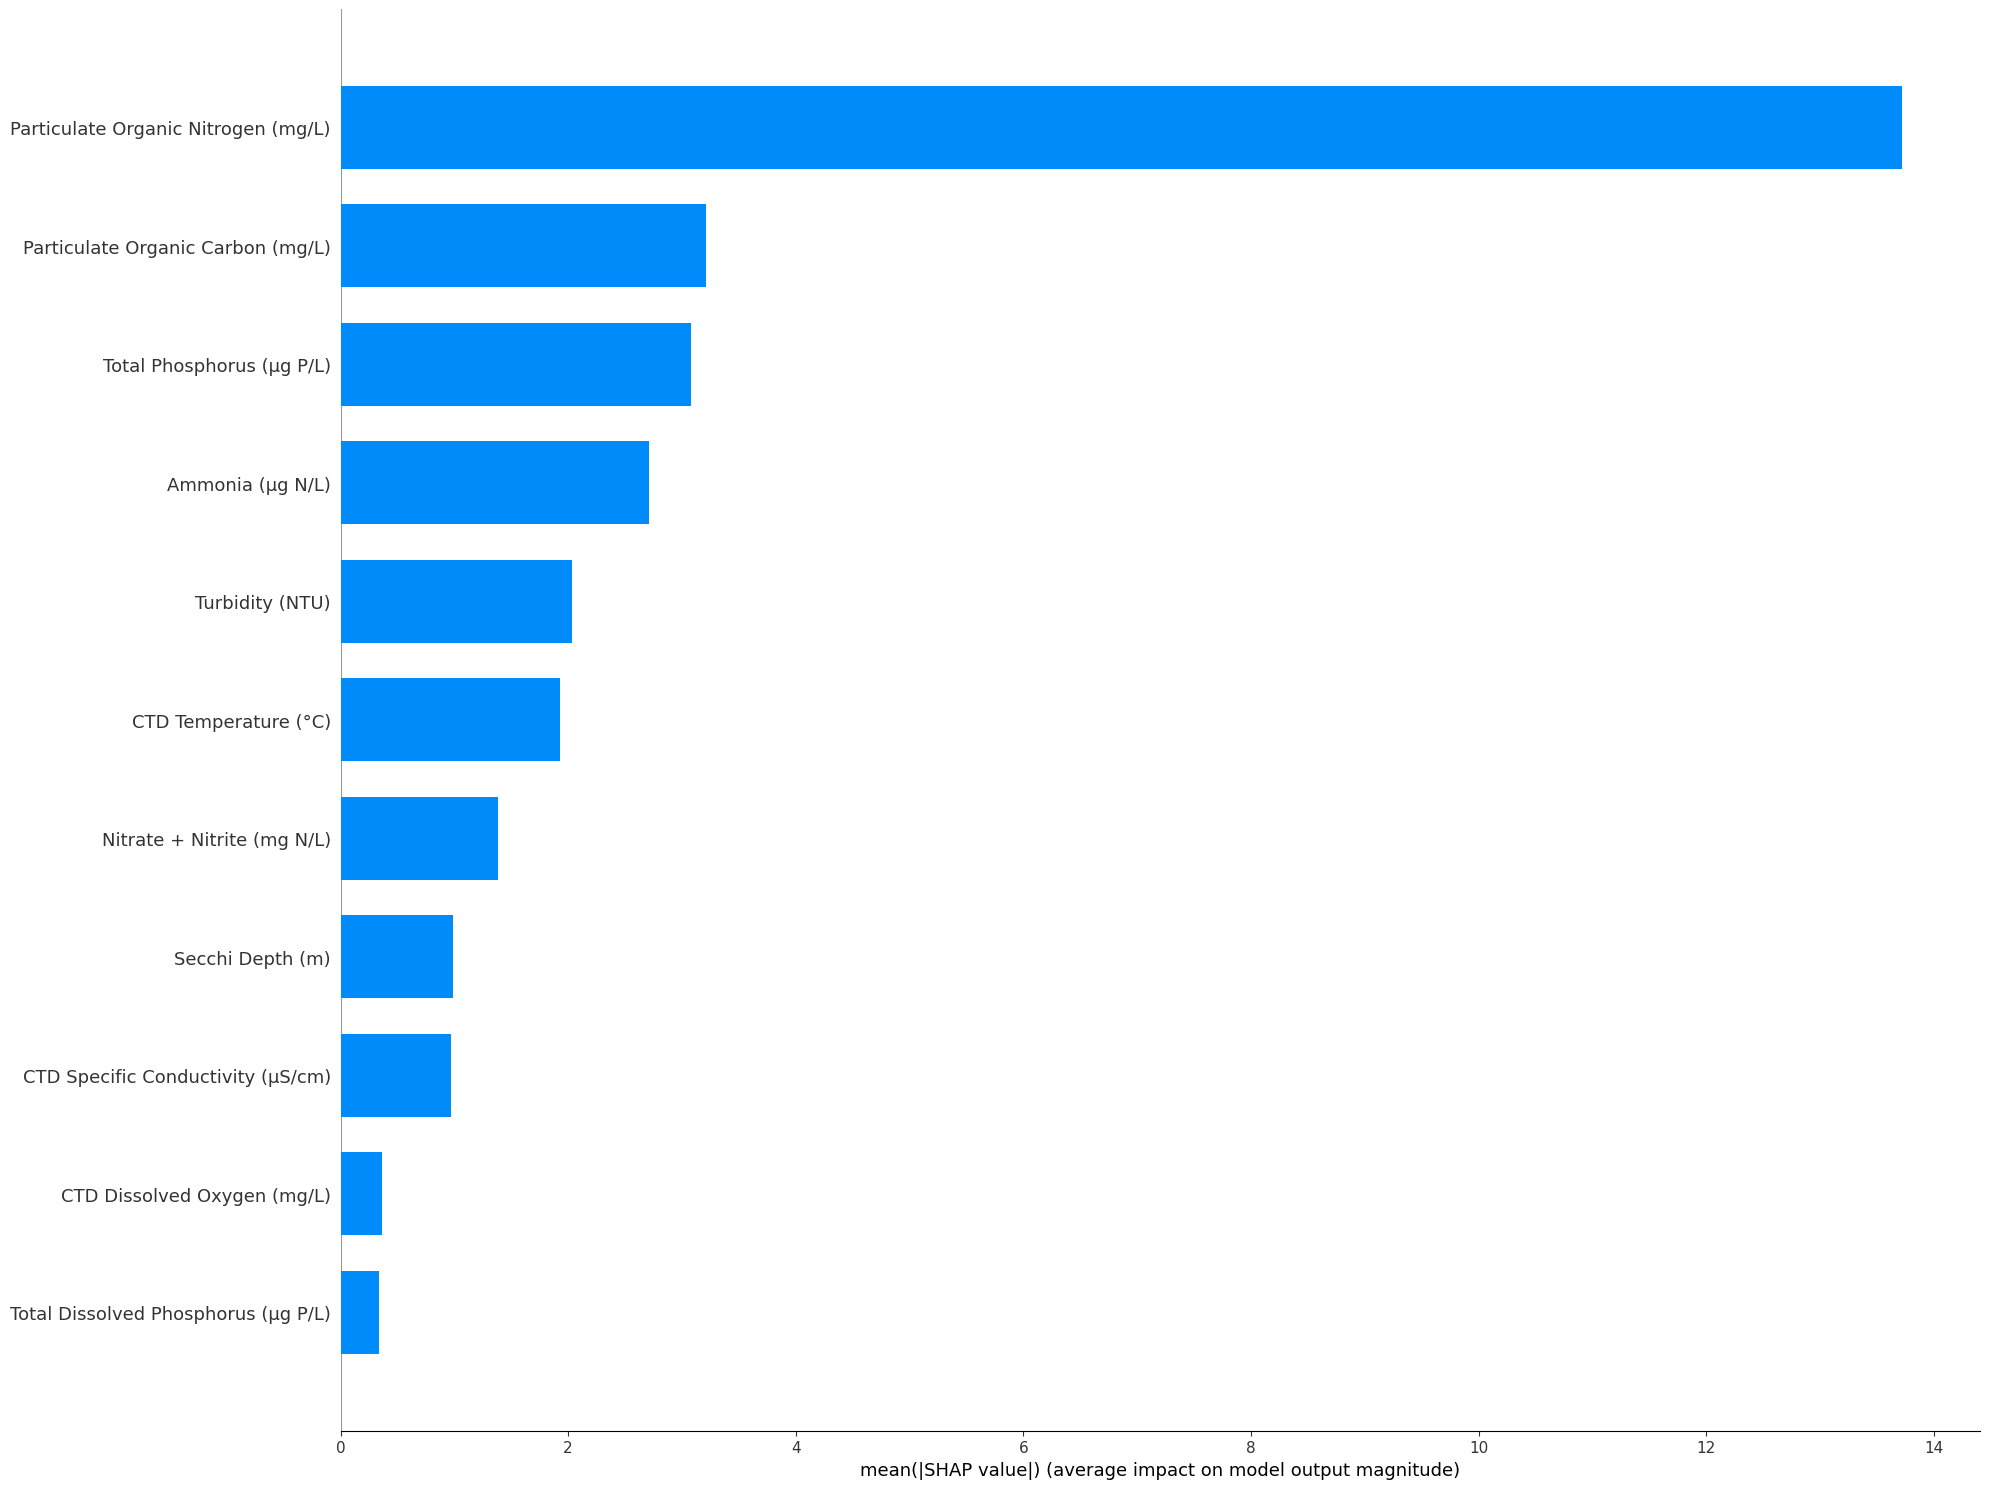

In [8]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

shap.summary_plot(shap_values, X_test,feature_names = features,plot_type="bar",plot_size=(20,15),show=False)


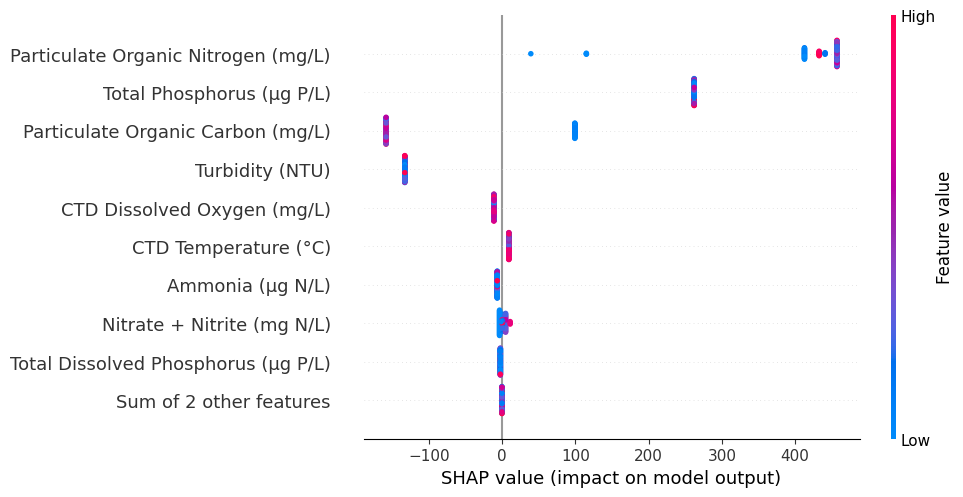

In [9]:
X_test_shap = pd.DataFrame(test.iloc[:,4:15])
shap_values = explainer(X_test_shap)
shap.plots.beeswarm(shap_values=shap_values)

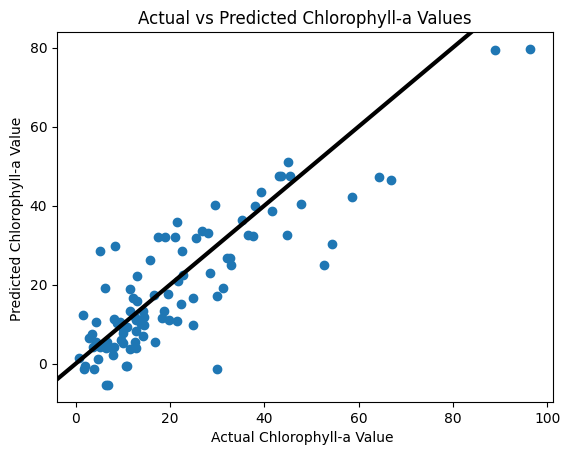

In [10]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, res)
plt.xlabel('Actual Chlorophyll-a Value ')
plt.ylabel('Predicted Chlorophyll-a Value ')
plt.title('Actual vs Predicted Chlorophyll-a Values')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=3, scalex=False, scaley=False)
plt.show()